In [1]:
import sys
#!conda install --yes --prefix {sys.prefix} seaborn
#!conda install --yes --prefix {sys.prefix} matplotlib

import json
import os
import pandas
import re
import seaborn
import datetime

from glob import glob
from os import path
from pandas import DataFrame
from typing import Any, Callable, Dict, List, Optional, Sequence, Set, Tuple

%matplotlib inline

/Users/annie-mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:65: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(*args, **kwargs)
/Users/annie-mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:65: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(*args, **kwargs)
/Users/annie-mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:65: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.figure.savefig(*args, **kwargs)
/Users/annie-mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:65: MatplotlibDeprecationWarning: sa

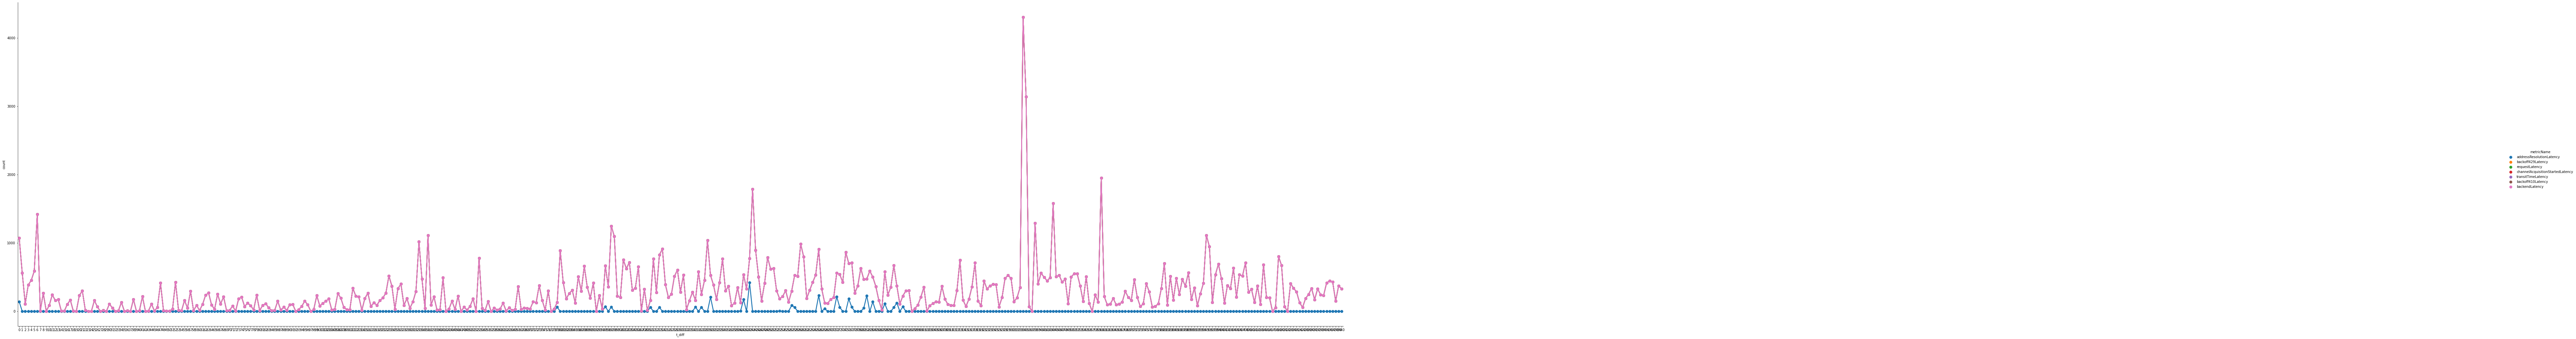

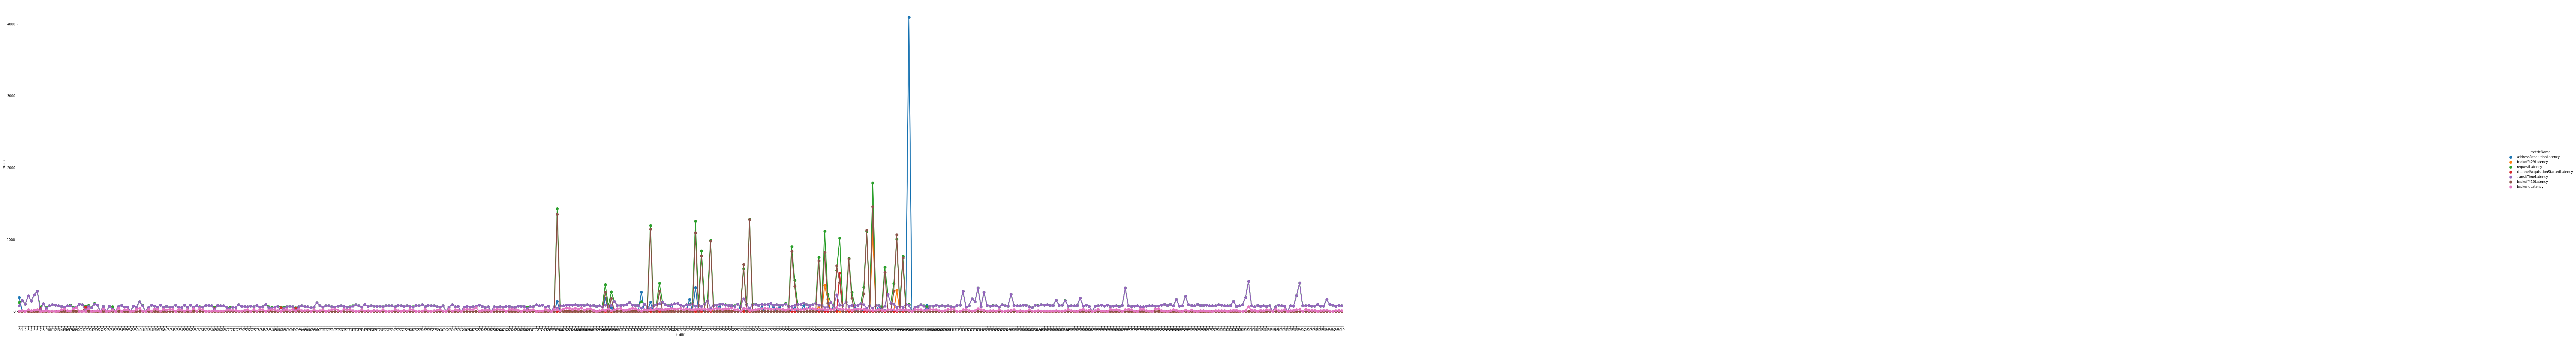

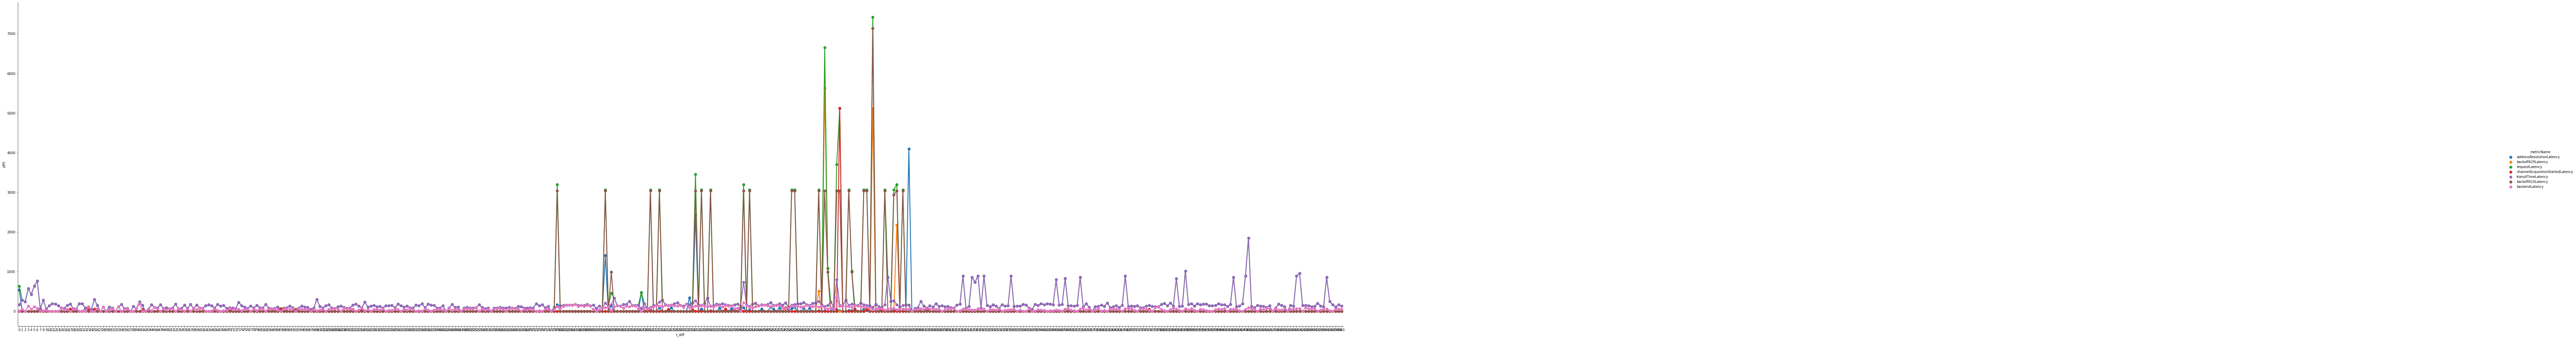

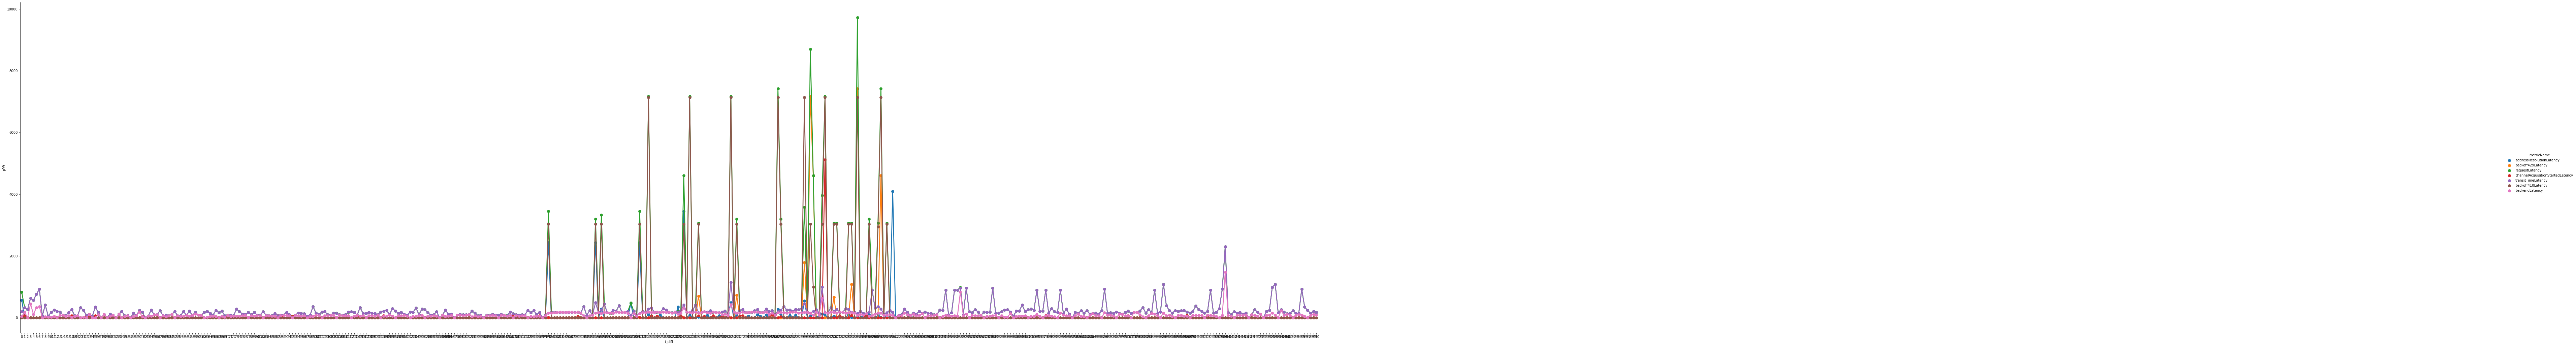

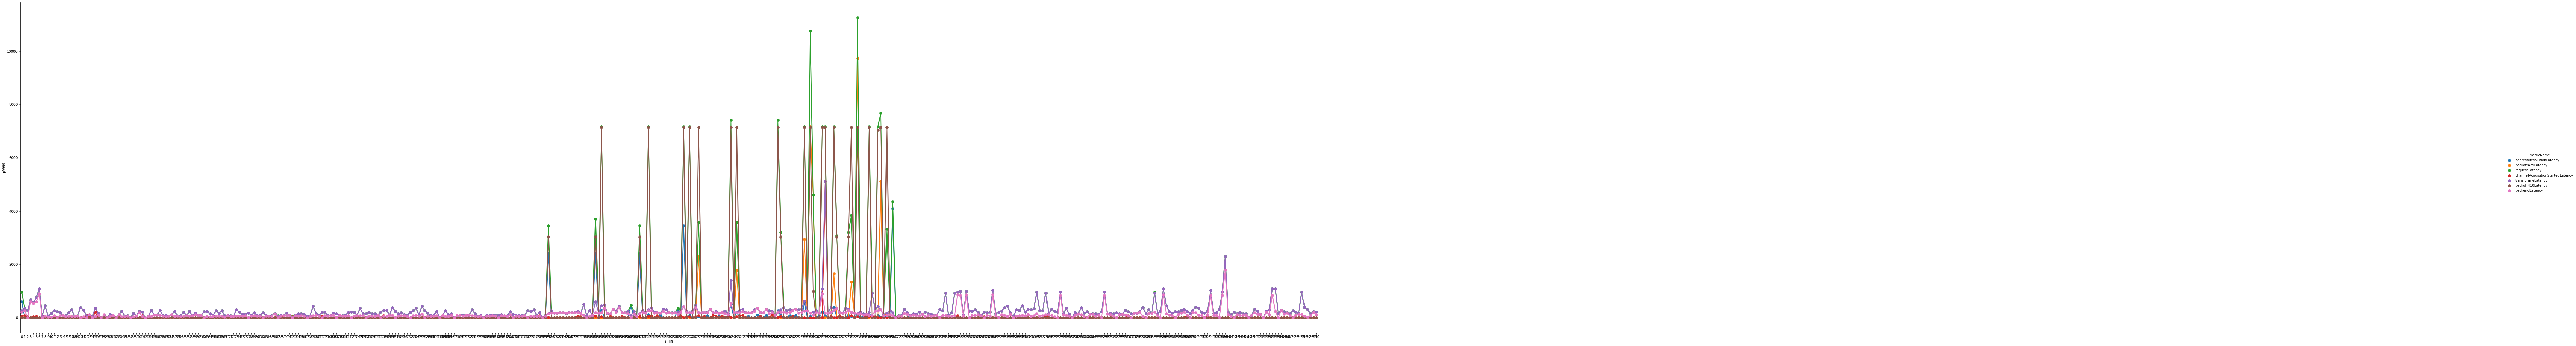

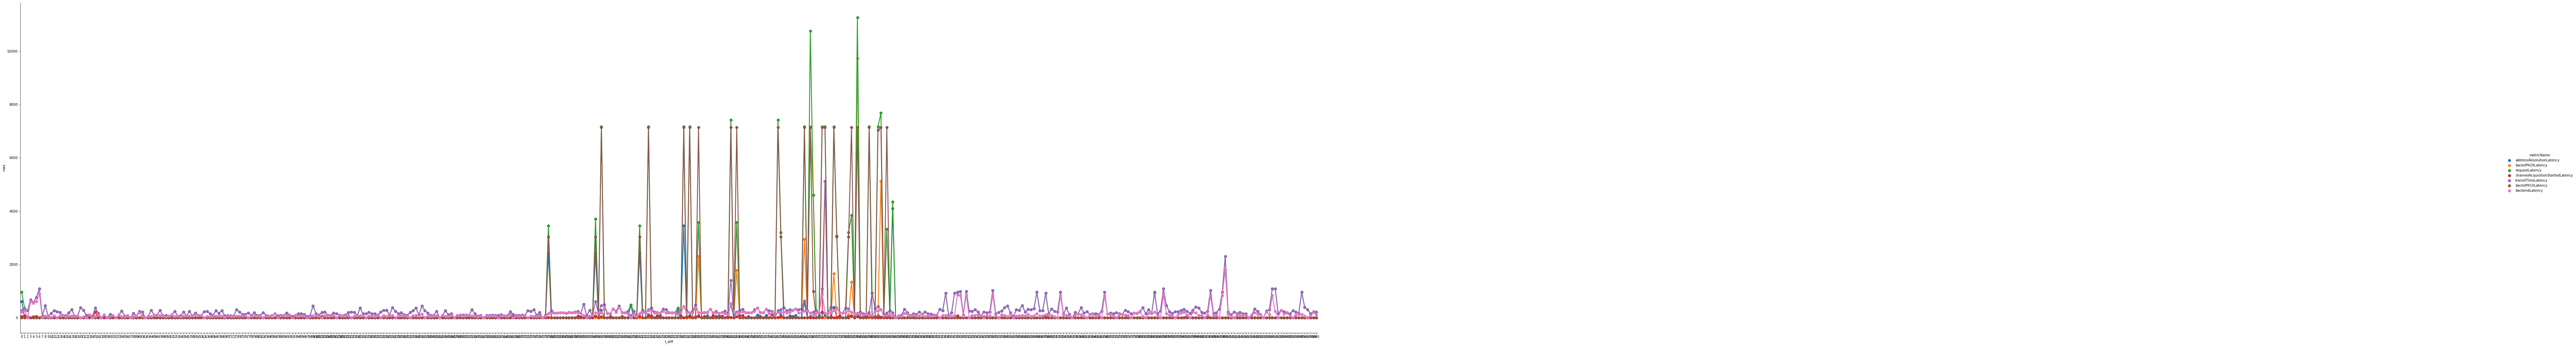

In [2]:
# Consolidate data
import pandas as pd
import os
import glob
import seaborn as sns

cwd : str = os.getcwd()
tables: List[Tuple] = []

try:
    os.chdir('..')
    # concat all the csv files
    path = os.path.join(os.getcwd(), "upgrade/write/parsingResult/fix/vm1/2022-10-11-02-47-21/")
    all_files = glob.glob(os.path.join(path , "*Latency.csv"))
    result = []
    
    for filename in all_files:
        df = pd.read_csv(filename, skipinitialspace=True)
        df['time'] = df['t'].astype('int')
        startTime : int = df['time'][0]
        df['t_diff'] = df['time'].apply(lambda x: ((x - startTime)//(60000)))
                                        
        result.append(df)
        
    frame = pd.concat(result, axis=0, ignore_index=True)
    df_allLatency_write = frame
#     df_allLatency_write = frame[frame['metricName'].str.contains('Latency')]
    #df_retry_write = frame[frame['metricName'].str.contains('retry')]

    ci = 100
    
    count_plot : seaborn.FacetGrid = seaborn.catplot(
            data=frame,
            x='t_diff',
            y='count',
            #height=8.5,
            ci = ci,
            hue='metricName',
            kind='point',
            margin_titles=True)
    count_plot.fig.set_size_inches(128,16)    
    count_plot.savefig(os.path.join(path, "counts.pdf"), format='pdf', papertype='letter')
    
    mean_plot : seaborn.FacetGrid = seaborn.catplot(
            data=df_allLatency_write,
            x='t_diff',
            y='mean',
            #height=8.5,
            ci = ci,
            hue='metricName',
            kind='point',
            margin_titles=True)
    mean_plot.fig.set_size_inches(128,16)    
    mean_plot.savefig(os.path.join(path, "meanLatency.pdf"), format='pdf', papertype='letter')
    
#     mean_retry_plot : seaborn.FacetGrid = seaborn.catplot(
#             data=df_retry_write,
#             x='t_diff',
#             y='mean',
#             #height=8.5,
#             ci = ci,
#             hue='metricName',
#             kind='point',
#             margin_titles=True)
#     mean_retry_plot.fig.set_size_inches(128,16)    
#     mean_retry_plot.savefig(os.path.join(path, "meanRetry.pdf"), format='pdf', papertype='letter')
    
    p95_plot : seaborn.FacetGrid = seaborn.catplot(
            data=df_allLatency_write,
            x='t_diff',
            y='p95',
            #height=8.5,
            ci = ci,
            hue='metricName',
            kind='point',
            margin_titles=True)
    p95_plot.fig.set_size_inches(128,16)    
    p95_plot.savefig(os.path.join(path, "p95.pdf"), format='pdf', papertype='letter')
    
    
    p99_plot : seaborn.FacetGrid = seaborn.catplot(
            data=df_allLatency_write,
            x='t_diff',
            y='p99',
            #height=8.5,
            ci = ci,
            hue='metricName',
            kind='point',
            margin_titles=True)
    p99_plot.fig.set_size_inches(128,16)    
    p99_plot.savefig(os.path.join(path, "p99.pdf"), format='pdf', papertype='letter')
    
    p9999_plot : seaborn.FacetGrid = seaborn.catplot(
            data=df_allLatency_write,
            x='t_diff',
            y='p9999',
            #height=8.5,
            ci = ci,
            hue='metricName',
            kind='point',
            margin_titles=True)
    p9999_plot.fig.set_size_inches(128,16)    
    p9999_plot.savefig(os.path.join(path, "p9999.pdf"), format='pdf', papertype='letter')
    
    max_plot : seaborn.FacetGrid = seaborn.catplot(
            data=df_allLatency_write,
            x='t_diff',
            y='max',
            #height=8.5,
            ci = ci,
            hue='metricName',
            kind='point',
            margin_titles=True)
    max_plot.fig.set_size_inches(128,16)    
    max_plot.savefig(os.path.join(path, "max.pdf"), format='pdf', papertype='letter')

finally:
    os.chdir(cwd)